In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv('ENB2012_data.csv')

In [46]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB


In [48]:
df.shape

(1296, 10)

In [49]:
df.isnull().sum()

X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64

**So we will be dropping the NaN values**

In [50]:
df = df.dropna()
print(f'The number of null values now in every column is {df.isnull().sum().sum()}')

The number of null values now in every column is 0


**Two target variables are heating load and the cooling load. We are supposed to predict the Heating Load**

<Axes: xlabel='Y2'>

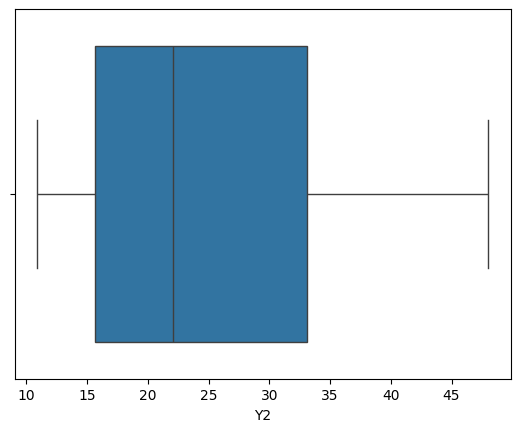

In [51]:
sns.boxplot(x='Y2', data = df) #By continously changing the values of the x attribute inside the boxplot paranthesis we learned that there are no outliers which are needed to be handled

              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222722e-01 -6.581202e-01  4.556712e-01 -8.618283e-01  8.894307e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -3.459372e-17  3.636925e-1

<Axes: >

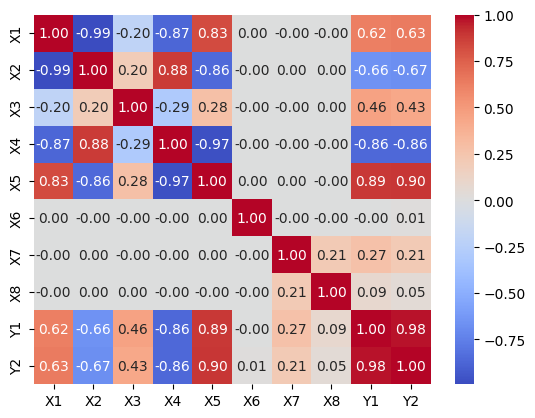

In [52]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot =  True, cmap='coolwarm', fmt ='.2f')




**There is strong correlation between Y1,Y2 and X1,X2,X3,X4,X5**


In [53]:
df.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3.0,0.0,0.0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4.0,0.0,0.0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5.0,0.0,0.0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2.0,0.0,0.0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3.0,0.0,0.0,19.95,21.97


In [54]:
independant_col = ['X1','X2','X3','X4','X5']
target_col=['Y1','Y2']
x = df[independant_col]
y =df[target_col]

In [55]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 42)

In [57]:
x_train.shape


(614, 5)

In [58]:
x_test.shape


(154, 5)

In [59]:
614/154

3.987012987012987

**Therefore the given data has been successfully splited into desired ratio**

In [60]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
Y_pred_lr = lr_model.predict(x_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
Y_pred_ridge = ridge_model.predict(x_test)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
Y_pred_lasso = lasso_model.predict(x_test)

**The Scores due to the models used are caluclated below**

In [61]:
ridge_model.score(x_test,y_test)

0.8512285840905137

In [62]:
lr_model.score(x_test,y_test)

0.8516925183420243

In [63]:
lasso_model.score(x_test,y_test)

0.7813668369997759

In [64]:
metrics = {}
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    metrics[model_name] = {"R2 Score": r2, "MSE": mse, "RMSE": rmse}


evaluate_model(y_test, Y_pred_lr, "Sklearn Linear Regression")
evaluate_model(y_test, Y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, Y_pred_lasso, "Lasso Regression")

**Plot predicted**

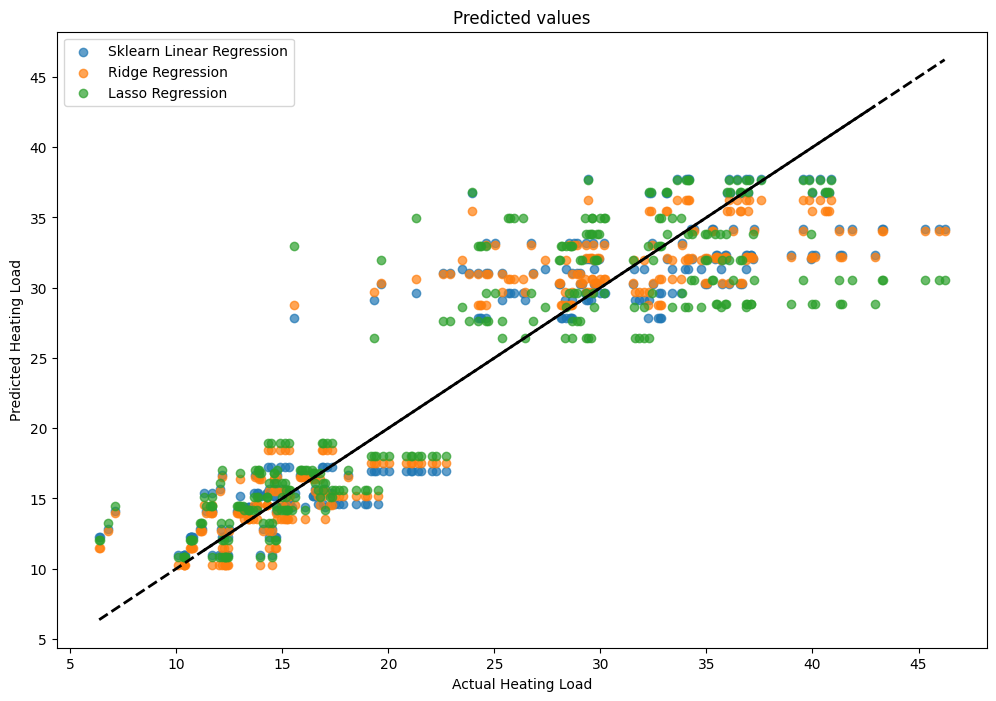

ValueError: Length of values (2) does not match length of index (5)

In [75]:

plt.figure(figsize=(12, 8))
plt.scatter(y_test, Y_pred_lr, label="Sklearn Linear Regression", alpha=0.7)
plt.scatter(y_test, Y_pred_ridge, label="Ridge Regression", alpha=0.7)
plt.scatter(y_test, Y_pred_lasso, label="Lasso Regression", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.legend()
plt.title("Predicted values")
plt.show()

# Insights and suggestions
important_features = lr_model.coef_
feature_importance = pd.Series(important_features, index=x.columns).sort_values(ascending=False)
print("Feature importance for heating load:")
print(feature_importance)


**SUGGESTION**

**1. Focus on improving insulation and wall design as wall area significantly impacts heating load.
2. Optimize glazing area and its distribution to balance natural light and thermal efficiency.
3. Enhance roof area design to minimize heat loss in cold climates.
4. Consider relative compactness to reduce surface area exposure to the external environment.**